## Experiment 7 & 8
### Aim: Apply filter feature selection Techniques Part-l & 2

In [7]:
from google.colab import files

uploaded = files.upload()


Saving Data.csv to Data.csv
Saving grapes_new.csv to grapes_new.csv
Saving student_info.csv to student_info.csv
Saving student_scores.csv to student_scores.csv


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("grapes_new.csv")
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [25]:
X_train_balanced = X.dropna()
y_train_balanced = y[X_train_balanced.index]

In [26]:
from sklearn.feature_selection import mutual_info_classif
X_train_balanced = pd.get_dummies(X_train_balanced, drop_first=True)

if y_train_balanced.dtype == 'object':
    y_train_balanced = y_train_balanced.astype('category').cat.codes

mi_scores = mutual_info_classif(X_train_balanced, y_train_balanced)
mi_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Mutual_Info_Score': mi_scores})
mi_threshold = 0.01
selected_mi_features = mi_df[mi_df['Mutual_Info_Score'] > mi_threshold]

n_selected_mi_features = len(selected_mi_features)
print(f"Total features selected: {n_selected_mi_features}")
print(f"Features chosen:\n{selected_mi_features}")


Total features selected: 18
Features chosen:
              Feature  Mutual_Info_Score
0     COLOR_INTENSITY           0.434939
1        RIPENESS_PER           0.692009
2         ALCOHOL_PER           0.373625
3      MALIC_ACID_PER           0.209220
5   ALCALINITY_OF_ASH           0.221567
6   MAGNESIUM_MEASURE           0.164503
7       TOTAL_PHENOLS           0.248505
8          FLAVANOIDS           0.505918
9     PROANTHOCYANINS           0.187081
10                HUE           0.275918
11            PROLINE           0.419890
12        TEMPERATURE           0.857719
13       AVG_HUMIDITY           0.243780
14     FERT_NITRO_PER           0.807124
15       WATER_O2_PER           0.806009
16           WATER_PH           0.547270
17       FER_P2O5_PER           0.256683
19  SOIL_TYPE_archean           0.025861


#Chi Sq.

In [11]:
from sklearn.feature_selection import chi2

chi2_scores, chi2_pvals = chi2(X_train_balanced, y_train_balanced)
chi2_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Chi2_Score': chi2_scores, 'P-Value': chi2_pvals})

chi2_threshold = 10
p_value_limit = 0.05

selected_chi2_features = chi2_df[(chi2_df['Chi2_Score'] > chi2_threshold) & (chi2_df['P-Value'] < p_value_limit)]

n_selected_chi2_features = len(selected_chi2_features)
print(f"Features chosen via Chi-Square and p-value filtering: {n_selected_chi2_features}")
print(f"Selected features:\n{selected_chi2_features}")


Features chosen via Chi-Square and p-value filtering: 11
Selected features:
              Feature    Chi2_Score       P-Value
0     COLOR_INTENSITY    148.100611  6.924060e-33
1        RIPENESS_PER     28.974040  5.109368e-07
3      MALIC_ACID_PER     20.083382  4.354608e-05
5   ALCALINITY_OF_ASH     28.475270  6.556523e-07
6   MAGNESIUM_MEASURE     36.703588  1.071315e-08
7       TOTAL_PHENOLS     12.413487  2.015792e-03
8          FLAVANOIDS     50.201153  1.255909e-11
11            PROLINE  13021.687652  0.000000e+00
12        TEMPERATURE     52.146437  4.748376e-12
15       WATER_O2_PER     46.198502  9.292290e-11
17       FER_P2O5_PER    126.341988  3.674396e-28


#Pearson Co.

In [12]:
import pandas as pd
import numpy as np

# Step 1: Calculate Pearson correlation between each feature and the target
correlation_scores = X_train_balanced.corrwith(y_train_balanced)

# Step 2: Create a DataFrame to store feature names and their correlation coefficients
corr_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Pearson_Correlation': correlation_scores})

# Step 3: Set a correlation threshold for feature selection
correlation_threshold = 0.1  # Adjust this threshold as needed

# Step 4: Filter features that have an absolute correlation coefficient above the threshold
selected_features_corr = corr_df[abs(corr_df['Pearson_Correlation']) > correlation_threshold]

# Step 5: Sort the features based on the Pearson correlation (absolute values)
selected_features_corr = selected_features_corr.sort_values(by='Pearson_Correlation', ascending=False)

# Step 6: Display the number of selected features and the selected feature names
num_selected_features_corr = len(selected_features_corr)
print(f"Number of selected features based on Pearson correlation threshold: {num_selected_features_corr}")
print(f"Selected features:\n{selected_features_corr}")

Number of selected features based on Pearson correlation threshold: 18
Selected features:
                             Feature  Pearson_Correlation
FER_P2O5_PER            FER_P2O5_PER             0.468916
RIPENESS_PER            RIPENESS_PER             0.454740
TEMPERATURE              TEMPERATURE             0.426633
ALCALINITY_OF_ASH  ALCALINITY_OF_ASH             0.335672
AVG_HUMIDITY            AVG_HUMIDITY             0.133431
HUE                              HUE             0.114155
MALIC_ACID_PER        MALIC_ACID_PER            -0.132241
PROANTHOCYANINS      PROANTHOCYANINS            -0.147289
SOIL_TYPE_archean  SOIL_TYPE_archean            -0.158108
FLAVANOIDS                FLAVANOIDS            -0.282259
TOTAL_PHENOLS          TOTAL_PHENOLS            -0.313190
MAGNESIUM_MEASURE  MAGNESIUM_MEASURE            -0.313197
ASH                              ASH            -0.328715
FERT_NITRO_PER        FERT_NITRO_PER            -0.348544
WATER_O2_PER            WATER_O2_PER    

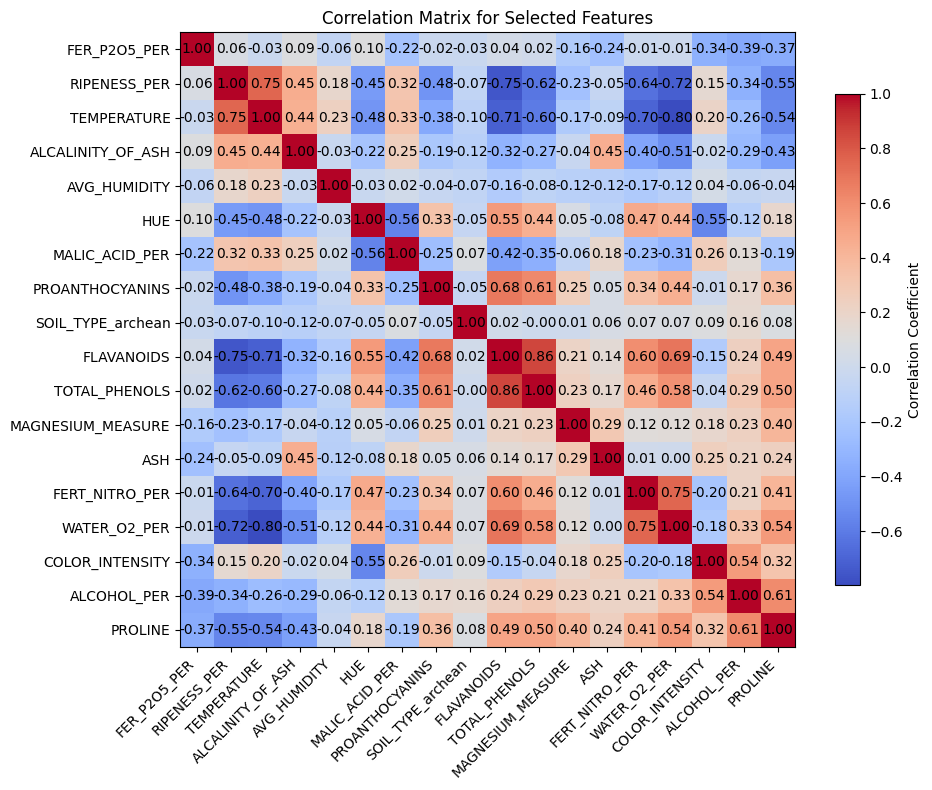

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract the selected feature names and data
selected_feature_names = selected_features_corr['Feature'].tolist()
selected_X_train = X_train_balanced[selected_feature_names]

# Step 2: Calculate the correlation matrix for the selected features
correlation_matrix_selected = selected_X_train.corr()

# Step 3: Plot the correlation matrix using matplotlib's imshow
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.imshow(correlation_matrix_selected, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient', shrink=0.8)
plt.xticks(ticks=np.arange(len(selected_feature_names)), labels=selected_feature_names, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(selected_feature_names)), labels=selected_feature_names)
plt.title('Correlation Matrix for Selected Features')

# Adding annotations
for i in range(len(selected_feature_names)):
    for j in range(len(selected_feature_names)):
        plt.text(j, i, f'{correlation_matrix_selected.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


#Exp-9 & 10

###AIM: Apply wrapper feature selection Techniques Part-1 & 2

*-The Wrapper Methods Are As Follows One By One :*

In [1]:
pip install mlxtend

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequenatialFeatureSelector as SFS

ImportError: cannot import name 'SequenatialFeatureSelector' from 'mlxtend.feature_selection' (/usr/local/lib/python3.10/dist-packages/mlxtend/feature_selection/__init__.py)

#-Forward Selection.

In [15]:
# Forward Selection
# Sequential Forward Selection (sfs)
model = LogisticRegression()
sfs = SFS
          (model,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_balanced, y_train_balanced)

# Features selected by Forward Selection
selected_features_forward = list(sfs.k_feature_names_)
num_selected_features_forward = len(selected_features_forward)

print(f"Number of features selected by Forward Selection: {num_selected_features_forward}")
print(f"Selected features:\n{selected_features_forward}")

NameError: name 'SFS' is not defined

#-Backward Elimination.


In [16]:
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe = rfe.fit(X_train_balanced, y_train_balanced)

# Get the ranking of the features
ranking = rfe.ranking_
selected_features_backward = X_train_balanced.columns[ranking == 1]
num_selected_features_backward = len(selected_features_backward)

print(f"\nNumber of features selected by Backward Elimination: {num_selected_features_backward}")
print(f"Selected features:\n{selected_features_backward.tolist()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Number of features selected by Backward Elimination: 1
Selected features:
['TEMPERATURE']


#-RFE.


In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can change this to any other model
import pandas as pd

# Step 1: Initialize the model and RFE
model = RandomForestClassifier(random_state=42)  # Replace with your model of choice
rfe = RFE(estimator=model, n_features_to_select=10)  # Choose the number of features to select

# Step 2: Fit RFE to the data
rfe.fit(X_train_balanced, y_train_balanced)

# Step 3: Get the selected feature names
selected_features_rfe = X_train_balanced.columns[rfe.support_]

# Step 4: Create a DataFrame with the selected features
rfe_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df = rfe_df[rfe_df['Selected'] == True]  # Filter the selected features

# Step 5: Display the selected features
num_selected_features_rfe = len(selected_features_rfe)
print(f"Number of selected features based on RFE: {num_selected_features_rfe}")
print(f"Selected features:\n{rfe_df}")


Number of selected features based on RFE: 10
Selected features:
            Feature  Selected  Ranking
0   COLOR_INTENSITY      True        1
1      RIPENESS_PER      True        1
2       ALCOHOL_PER      True        1
8        FLAVANOIDS      True        1
10              HUE      True        1
11          PROLINE      True        1
12      TEMPERATURE      True        1
14   FERT_NITRO_PER      True        1
15     WATER_O2_PER      True        1
16         WATER_PH      True        1


#-The CV For RFE.

Number of selected features based on RFECV: 4
Selected features:
           Feature  Selected  Ranking
1     RIPENESS_PER      True        1
12     TEMPERATURE      True        1
14  FERT_NITRO_PER      True        1
15    WATER_O2_PER      True        1


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

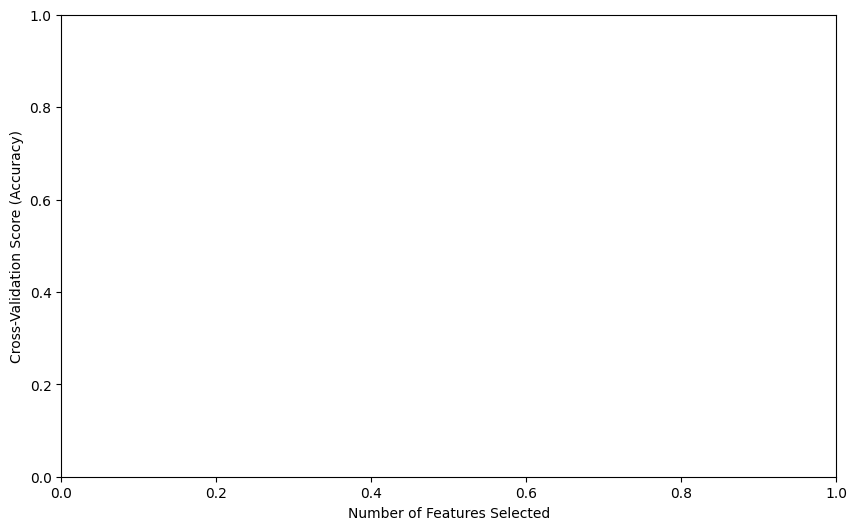

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier  # You can change this to any other model
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Initialize the model and RFECV
model = RandomForestClassifier(random_state=42)  # Replace with your model of choice
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')  # Use k-fold cross-validation

# Step 2: Fit RFECV to the data
rfecv.fit(X_train_balanced, y_train_balanced)

# Step 3: Get the selected feature names
selected_features_rfecv = X_train_balanced.columns[rfecv.support_]

# Step 4: Create a DataFrame with the selected features
rfecv_df = pd.DataFrame({'Feature': X_train_balanced.columns, 'Selected': rfecv.support_, 'Ranking': rfecv.ranking_})
rfecv_df = rfecv_df[rfecv_df['Selected'] == True]  # Filter the selected features

# Step 5: Display the selected features
num_selected_features_rfecv = len(selected_features_rfecv)
print(f"Number of selected features based on RFECV: {num_selected_features_rfecv}")
print(f"Selected features:\n{rfecv_df}")

# Step 6: Plot the number of features selected against cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("RFECV - Number of Features vs. Cross-Validation Score")
plt.show()

## Experiment 11
###  AIM: Using different ML supervised Classifiers

#Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
y_test = y_test.astype(int)

NameError: name 'y_test' is not defined

In [21]:
# Create a Bagging classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'X_test' is not defined

#Boosting.

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train_balanced = imputer.fit_transform(X_train_balanced)
X_test = imputer.transform(X_test)

NameError: name 'X_test' is not defined

In [39]:
# Create an AdaBoost classifier with Decision Trees as weak learners
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = boosting_clf.predict(X_test)
print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


NameError: name 'X_test' is not defined

#-Stacking.


In [40]:
    # Define base models
    estimators = [
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('svm', SVC(kernel='linear', probability=True))
    ]

    # Meta-model
    stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

    # Fit and evaluate
    stacking_clf.fit(X_train_balanced, y_train_balanced)
    y_pred = stacking_clf.predict(X_test)
    print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'X_test' is not defined